### Oscillator

This is the system in Example 2.11 in *Nonlinear Ordinary Differential Equations: An Introduction to Dynamical Systems,* by D.W. Jordan and P. Smith.

The system can be derived from the Hamiltonian
$$H(x,y) = -12 x + \frac{13}{2}(x^2 + y^2) - \frac{1}{4}(x^4 + y^4) - \frac{1}{2} x^2y^2.$$

The equations of motion are
\begin{align}
\dot x & = y(13 - x^2 - y^2)\\
\dot y &= 12 - x(13 -x^2 - y^2).
\end{align}

In terms of canonical variables,
$$H(q,p) = -12 q + \frac{13}{2}(q^2 + p^2) - \frac{1}{4}(q^4 + p^4) - \frac{1}{2} q^2p^2.$$
The equations of motion are
\begin{align}
    \dot q &= \frac{\partial H}{\partial p} = p(13 - q^2 - p^2)\\
    \dot p &= -\frac{\partial H}{\partial q} = 12 -q(13 - q^2 - p^2).
\end{align}

In [1]:
using DifferentialEquations
using Plots

In [2]:
function deqs!(du, u, p, t)
    r = u[1]^2 + u[2]^2
    du[1] = u[2]*(13.0 - r)
    du[2] = 12.0 - u[1]*(13.0 - r)
end

deqs! (generic function with 1 method)

In [3]:
function calham!(ham,x,y)
    @. ham = -12.0*x + 13.0/2.0*(x^2 + y^2) - 0.25*(x^4 + y^4) - 0.5*(x^2*y^2)
end

calham! (generic function with 1 method)

In [25]:
u0 = [0.0, -4.9]
p0 = [1.0]

1-element Vector{Float64}:
 1.0

In [26]:
tspan=(0.0, 2000.0)
prob = ODEProblem(deqs!, u0, tspan, p0)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 2000.0)
u0: 2-element Vector{Float64}:
  0.0
 -4.9

In [27]:
#alg = ABM54()
#alg = Vern9()
alg = Midpoint()
#alg = Euler()
#alg = Tsit5()
#alg = VCABM()
#alg = lsoda()
#alg = RK4()
#alg = Midpoint()
#alg = Vern7()
#alg = Rosenbrock32()
adapt = false
outdx = 1.0

1.0

In [28]:
sol = solve(prob, alg, reltol=1.0e-12, abstol=1.0e-12, adaptive=adapt, saveat=outdx, dt=0.0005);

In [22]:
tt = sol.t
s1 = sol[1,:]
s2 = sol[2,:];

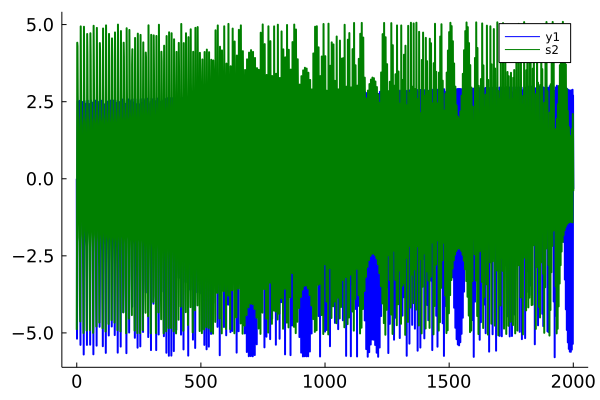

In [23]:
plot(tt,s1,
    lw=2,
    grid = :off,
    xtickfont=font(12),
    ytickfont=font(12),
    guidefont=font(12),
    linecolor=:blue,
    #legend=false,
    #xlims=(0.0,6000.0),
    #ylims=(-10.0,10.0)
    )
plot!(tt,s2,label="s2",linecolor=:green,lw=2)

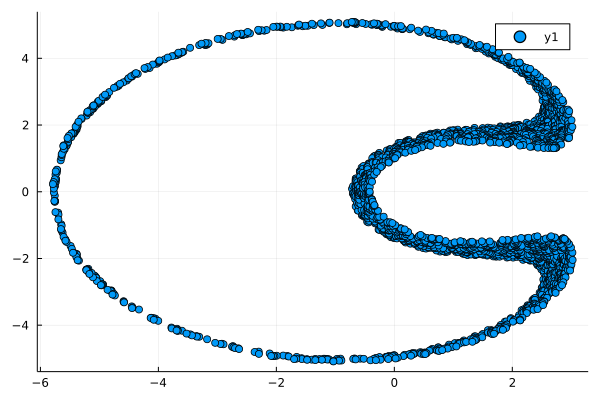

In [24]:
scatter(s1,s2)

Calculate the relative error in the total energy, $$\Delta E(t) = \frac{E(t) - E_0}{E_0}$$.

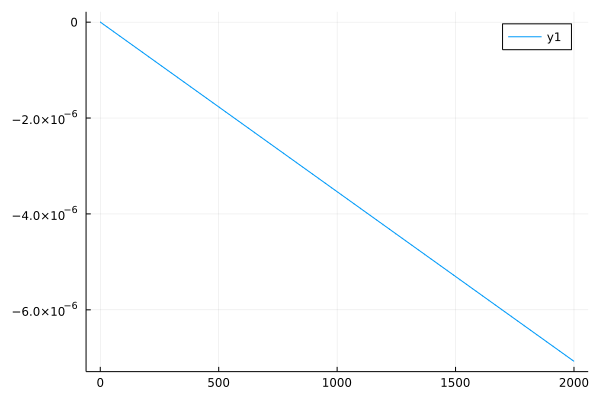

In [16]:
ham = similar(s1)
calham!(ham, s1, s2)
ham0 = ham[1]
@. ham = (ham - ham0)/ham0
plot(tt,ham)

In [11]:
adapt = false
tol = 1.0e-8
dt32 = 0.003
dt16 = dt32/2.0
dt8 = dt16/2.0
dt4 = dt8/2.0
dt2 = dt4/2.0
dt1 = dt2/2.0
sol32 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt32);
sol16 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt16);
sol8 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt8);
sol4 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt4);
sol2 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt2);
sol1 = solve(prob, alg, reltol=tol, abstol=tol, adaptive=adapt, saveat=0.1, dt=dt1);

In [12]:
s32 = sol32[1,:]
s16 = sol16[1,:]
s8 = sol8[1,:]
s4 = sol4[1,:]
s2 = sol2[1,:]
s1 = sol1[1,:]
d1 = similar(s1)
d2 = similar(s2)
d4 = similar(s4)
d8 = similar(s8)
d16 = similar(s16)
epsilon = 1.0e-17
@. d1 = abs(s1 - s2) + epsilon
@. d2 = abs(s2 - s4) + epsilon
@. d4 = abs(s4 - s8) + epsilon
@. d8 = abs(s8 - s16) + epsilon
@. d16 = abs(s16 - s32) + epsilon;
tt = sol1.t;

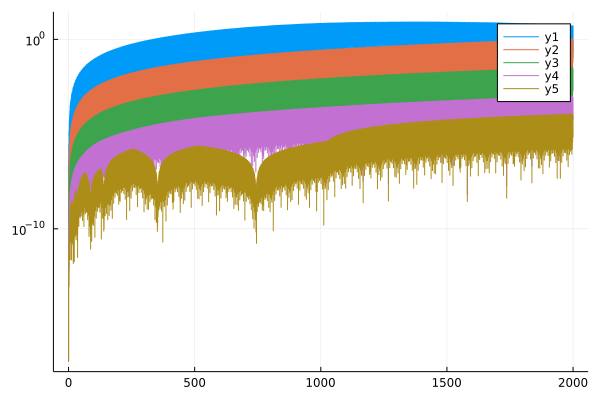

In [13]:
plot(tt, d16)
plot!(tt, d8)
plot!(tt, d4)
plot!(tt, d2)
plot!(tt, d1,yaxis=:log)